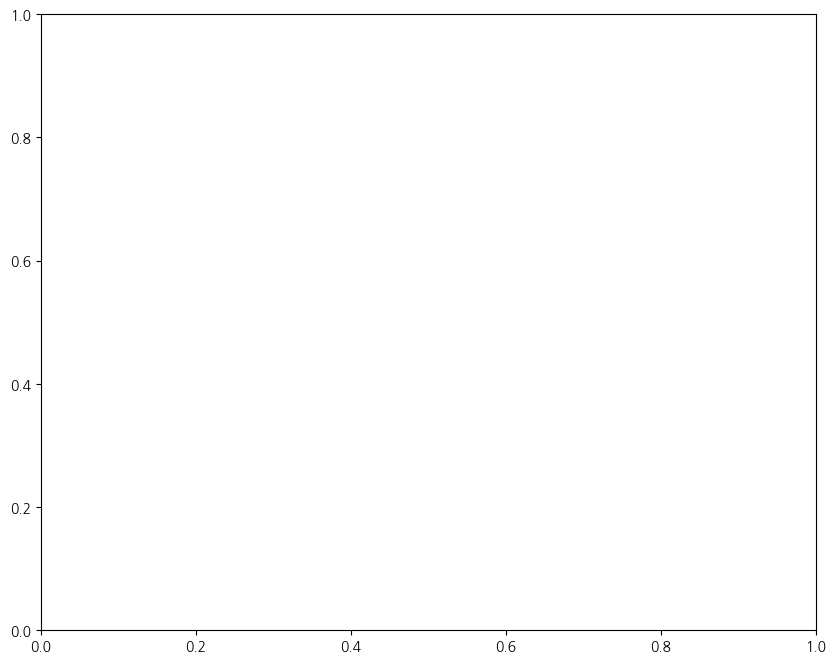

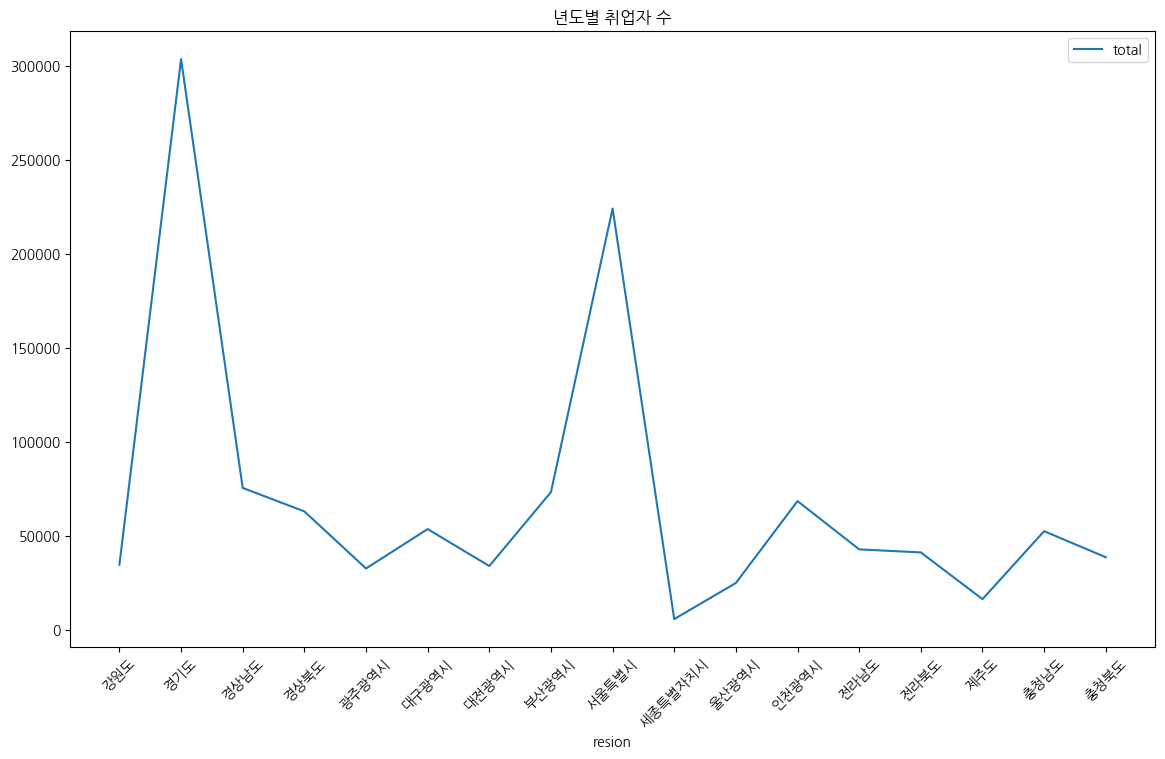

In [7]:
import pandas as pd
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 윈도우용 폰트 경로 설정
file_path = "./ref/행정구역시도성연령별취업자_20250304.csv"
ori = pd.read_csv(file_path, encoding="EUC-KR")
ex_data = ori.copy() # 원본 데이터 유지를 위해 복사
ex_data.columns = ['resion','year','age','gender','value'] # 컬럼이름 일괄 교체
ex_data = ex_data.drop(['age','gender'],axis=1)
ex_data.loc[ex_data['resion']=='세종특별자치시','value'] = ex_data.loc[ex_data['resion']=='세종특별자치시','value'].replace('-',0) #세종특별자치시

ex_data['value'] = ex_data['value'].astype(int)
ex_data = ex_data.groupby(['resion'])['value'].sum().reset_index(name='total')
plt.rc('font', family="NanumGothic")
fig, ax = plt.subplots(figsize=(10,8))

ex_data['total'] = ex_data['total'].astype(int) # 타입변경
ax = ex_data.plot(x='resion', y='total', figsize=(14,8), title="년도별 취업자 수")
ax.set_xticks(range(len(ex_data)))
ax.set_xticklabels(ex_data['resion'],rotation=45)
plt.show()